In [9]:
#from Jan 25 - Feb 4
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
import datetime as dt
from matplotlib import pyplot as plt 
import seaborn as sns

from erddapClient import ERDDAP_Server
from erddapClient import ERDDAP_Tabledap


In [ ]:
# pd.read_csv("test_erddap_retrieval.csv")

testdf = pd.read_csv("test_erddap_retrieval.csv", dtype='unicode') #,parse_dates=True ,header=[0,1]
#ideally this read_csv would include arg header = [0,1] but that messes up plotting (too much metadata?)
testdf.columns
#testdf["time"]
#print(testdf.dtypes)


In [4]:
test_remote = ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
test_remote.setResultVariables(['time','z'])
print(test_remote.getURL('htmlTable'))


print(test_remote)

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.htmlTable?time%2Cz
<erddapClient.ERDDAP_Tabledap>
Title:       Coastal Endurance: Oregon Inshore Surface Piercing Profiler Mooring: Surface Piercing Profiler: Spectral Irradiance
Server URL:  http://erddap.dataexplorer.oceanobservatories.org/erddap
Dataset ID:  ooi-ce01issp-sp001-07-spkirj000
Generated URL: http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.htmlTable?time%2Cz
Variables: 
  time (double) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  latitude (double) 
    Standard name: latitude 
    Units:         degrees_north 
  longitude (double) 
    Standard name: longitude 
    Units:         degrees_east 
  z (double) 
    Standard name: altitude 
    Units:         m 
  spectir_412nm (double) 
    Standard name: spectir 
    Units:         microW.cm-2.nm-1 
  spectir_412nm_qc_agg (int) 
    Standard

In [5]:
remote_td = ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
responseDf = (
    remote_td.setResultVariables(['time','z','spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm', 'spectir_683nm'])
            .getDataFrame()
)
responseDf

,time (UTC),z (m),spectir_412nm (microW.cm-2.nm-1),spectir_443nm (microW.cm-2.nm-1),spectir_490nm (microW.cm-2.nm-1),spectir_510nm (microW.cm-2.nm-1),spectir_555nm (microW.cm-2.nm-1),spectir_620nm (microW.cm-2.nm-1),spectir_683nm (microW.cm-2.nm-1)
0,2014-04-17T22:28:00Z,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17T22:28:00Z,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
49938,2022-09-27T07:53:00Z,-5.0,0.010989,-0.002785,0.010997,0.007728,-0.006375,-0.005846,0.008078
49939,2022-09-27T07:53:00Z,-4.0,0.010630,-0.002738,0.010916,0.007805,-0.006242,-0.005502,0.007749
49940,2022-09-27T07:53:00Z,-3.0,0.010466,-0.002522,0.010447,0.007654,-0.007148,-0.005562,0.007265
49941,2022-09-27T07:53:00Z,-2.0,0.010201,-0.002446,0.010259,0.007780,-0.006556,-0.005270,0.006446


In [6]:
#rewrite col names to eliminate everything after a space: the unit
df = responseDf
df.columns = df.columns.str.split(' ').str[0]
df.columns

Index(['time', 'z', 'spectir_412nm', 'spectir_443nm', 'spectir_490nm',
       'spectir_510nm', 'spectir_555nm', 'spectir_620nm', 'spectir_683nm'],
      dtype='object')

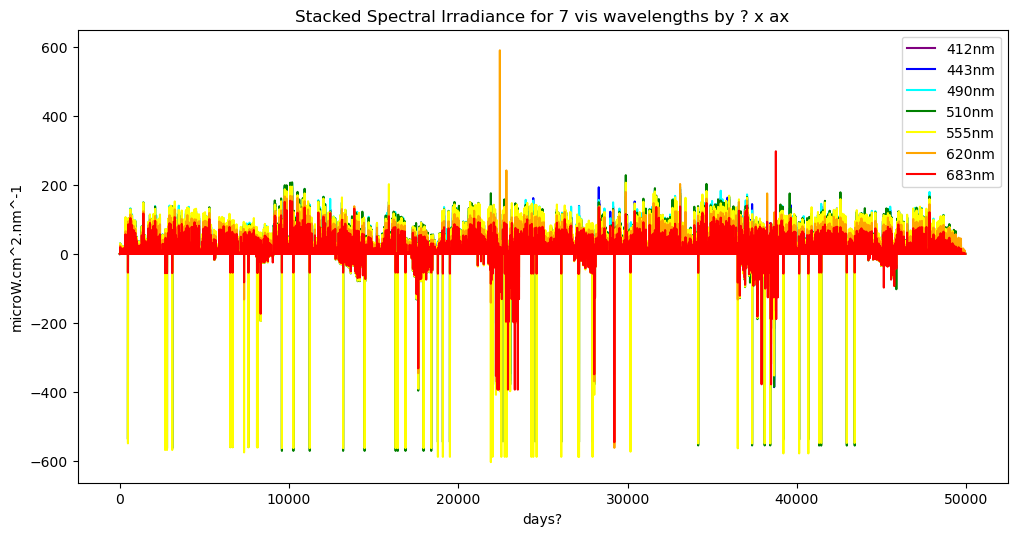

In [8]:
plt.figure(figsize=(12,6), dpi=100)
#responseDf['z (m)'].plot(label='z (m)', color='orange')
responseDf['spectir_412nm'].plot(label='412nm', color='purple')
responseDf['spectir_443nm'].plot(label='443nm', color='blue')
responseDf['spectir_490nm'].plot(label='490nm', color='cyan')
responseDf['spectir_510nm'].plot(label='510nm', color='green')
responseDf['spectir_555nm'].plot(label='555nm', color='yellow')
responseDf['spectir_620nm'].plot(label='620nm', color='orange')
responseDf['spectir_683nm'].plot(label='683nm', color='red')

plt.title('Stacked Spectral Irradiance for 7 vis wavelengths by ? x ax')
plt.xlabel("days?")
plt.ylabel("microW.cm^2.nm^-1")
plt.legend()
#plt.savefig("spec_irr_mysterious_xaxis.jpg")

(0.0, 3000.0)

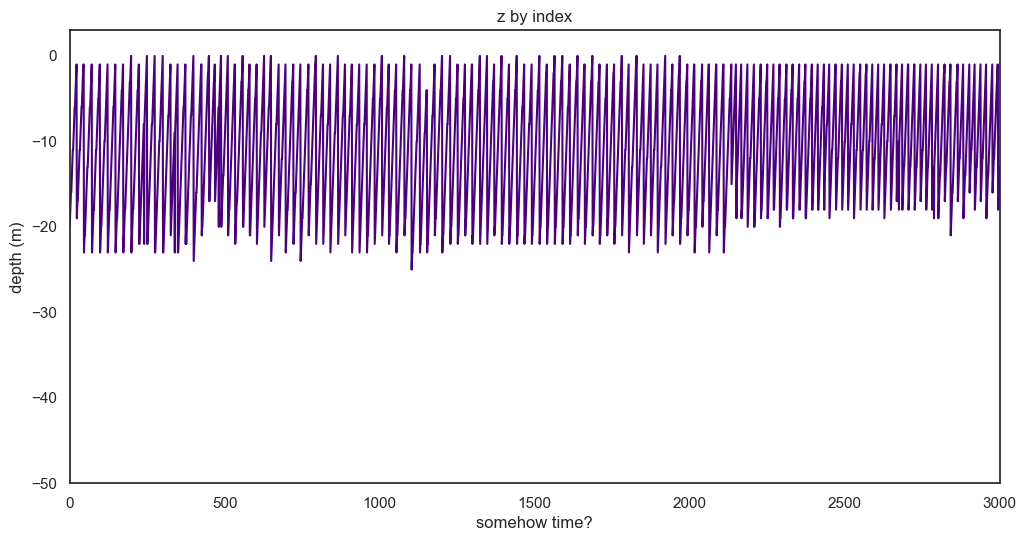

In [135]:
plt.figure(figsize=(12,6), dpi=100)
responseDf['z'].plot(label='z (m)', color='indigo')
plt.title('z by index')
plt.xlabel("somehow time?")
plt.ylabel("depth (m)")
plt.ylim((-50,3))
plt.xlim((0,3000))

#plt.savefig("z_by_index.jpg")

In [9]:
#turner trying to do 3d plotting: initialize with fake new df that has the right dimensions and 
# populated with wavelengths of interes
import numpy as np

#find a way to autmate this when passed df.columns?
#format: for loop along number of cols, maybe name variable by index +1 (1,2,3)
#format: before for loop sore variable as length of dataset: col length for these
#format: within for loop extract digits from already split string: should only be nm λ nums
#format: then line_%index = np.ones((_variable for col length_,1))*_digits for λ_
line412 = np.ones((49943,1))*412
line443 = np.zeros((49943,1)) + 443
line490 = np.zeros((49943,1)) + 490
line510 = np.zeros((49943,1)) + 510
line555 = np.zeros((49943,1)) + 555
line620 = np.zeros((49943,1)) + 620
line683 = np.zeros((49943,1)) + 683

#after for loop figure out how to np col stack variable number of cols

wavelength_array = (np.column_stack((line412,line443,line490,line510,line555,line620,line683))).astype(int)
wavelength_array
wavelength_df = pd.DataFrame(wavelength_array, columns = ['wavelength_412','wavelength_443','wavelength_490','wavelength_510','wavelength_555','wavelength_620','wavelength_683'])
wavelength_df

,wavelength_412,wavelength_443,wavelength_490,wavelength_510,wavelength_555,wavelength_620,wavelength_683
0,412,443,490,510,555,620,683
1,412,443,490,510,555,620,683
2,412,443,490,510,555,620,683
3,412,443,490,510,555,620,683
4,412,443,490,510,555,620,683
...,...,...,...,...,...,...,...
49938,412,443,490,510,555,620,683
49939,412,443,490,510,555,620,683
49940,412,443,490,510,555,620,683
49941,412,443,490,510,555,620,683


In [10]:
#x bounds: time
print("time min is: ",responseDf['time'].min())
print("time max is: ",responseDf['time'].max())

#y bounds: 412 to 683 nm

#z bounds: spect irr
print("dataset spectir min is: ",responseDf[['spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm','spectir_683nm']].min(axis=1).min())
print("dataset spectir max is: ",responseDf[['spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm','spectir_683nm']].max(axis=1).max())

time min is:  2014-04-17T22:28:00Z
time max is:  2022-09-27T07:53:00Z
dataset spectir min is:  -603.989492929
dataset spectir max is:  590.3492490098


In [47]:
pd.to_datetime('2014-04-17T22:28:00Z')
#wavelength_df['wavelength_412']
#responseDf['time']
#responseDf['spectir_412nm']

Timestamp('2014-04-17 22:28:00+0000', tz='UTC')

In [12]:
#dapted from https://gist.github.com/andy23512/dda305a40595e5caefe12e902ec03dad

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def format_date(x, pos=None):
    return dates.num2date(x).strftime('%Y-%m-%d') #use FuncFormatter to format dates

fig = plt.figure()
ax = fig.gca(projection='3d')
    

# Plot a sin curve using the x and y axes.
#for z in range(0, 50):
#    x = np.linspace(0, 1, 100)
#    y = z * np.sin(x * 2 * np.pi) / 50 / 2 + 0.5
#    ax.plot(x, y, zs=z, zdir='z', label='curve in (x,y)')

ax.plot(responseDf['time'], wavelength_df['wavelength_412'] , responseDf['spectir_412nm'])
ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

# Make legend, set axes limits and labels
#ax.legend()
#datetime xlim setting from : https://discourse.holoviz.org/t/xlim-for-datetime/1825/2
ax.set_xlim(pd.to_datetime('2014-04-17T22:28:00Z'), pd.to_datetime('2022-09-27T07:53:00Z'))
ax.set_ylim(410, 690)
ax.set_zlim(-604, 600)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

ValueError: could not convert string to float: '2014-04-17T22:28:00Z'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 432x288 with 1 Axes>

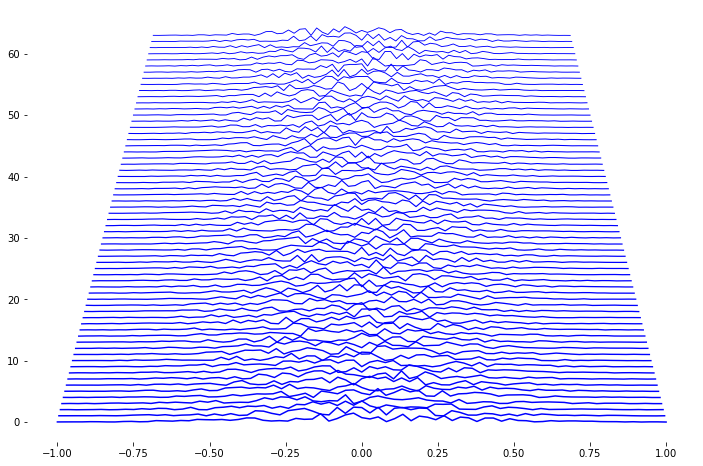

In [30]:
#adjust this from https://stackoverflow.com/questions/66009115/3d-plot-of-multiple-time-series-in-python ?
#or ridge plot from here https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(12, 8))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="b", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
#ax.set_ylim(-1, 70)



In [10]:
responseDf

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
0,2014-04-17T22:28:00Z,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17T22:28:00Z,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
49938,2022-09-27T07:53:00Z,-5.0,0.010989,-0.002785,0.010997,0.007728,-0.006375,-0.005846,0.008078
49939,2022-09-27T07:53:00Z,-4.0,0.010630,-0.002738,0.010916,0.007805,-0.006242,-0.005502,0.007749
49940,2022-09-27T07:53:00Z,-3.0,0.010466,-0.002522,0.010447,0.007654,-0.007148,-0.005562,0.007265
49941,2022-09-27T07:53:00Z,-2.0,0.010201,-0.002446,0.010259,0.007780,-0.006556,-0.005270,0.006446


In [13]:
response_small = responseDf.head(100)
response_small['time'] = pd.to_datetime(response_small['time'])

<ipython-input-13-f22ba90e2df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_small['time'] = pd.to_datetime(response_small['time'])


fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
ax1.plot(responseDf["time"], responseDf["spectir_412nm"])
ax2.plot(responseDf["time"], responseDf["spectir_443nm"])

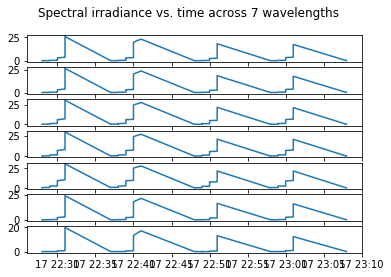

In [15]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,sharex=True)
fig.suptitle('Spectral irradiance vs. time across 7 wavelengths')
ax1.plot(response_small["time"], response_small["spectir_412nm"])
ax2.plot(response_small["time"], response_small["spectir_443nm"])
ax3.plot(response_small["time"], response_small["spectir_490nm"])
ax4.plot(response_small["time"], response_small["spectir_510nm"])
ax5.plot(response_small["time"], response_small["spectir_555nm"])
ax6.plot(response_small["time"], response_small["spectir_620nm"])
ax7.plot(response_small["time"], response_small["spectir_683nm"])

ok now i want to see different wavelength peaks for a given time

<AxesSubplot:xlabel='spectir_412nm', ylabel='Density'>

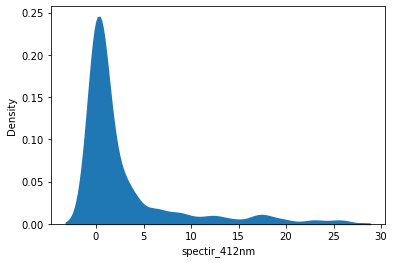

In [54]:
sns.kdeplot(data=response_small,  x=response_small["spectir_412nm"],
          bw_adjust=.5, clip_on=False,fill=True, alpha=1, linewidth=1.5)

<AxesSubplot:xlabel='time', ylabel='spectir_412nm'>

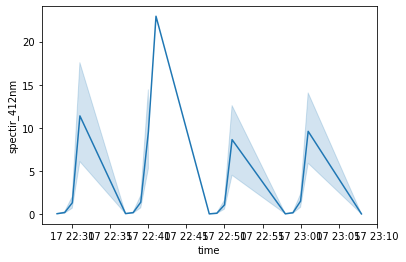

In [35]:
sns.lineplot(x = "time", y = "spectir_412nm",
             data = response_small)

firckin x axis is not datetime

# THIS HAS BEEN UPDATED see pal and pal_black

#trying to adapt from above: https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
#change color scale for 12 months

#from https://academo.org/demos/wavelength-to-colour-relationship/: 
        412 purple, 443 blue,  490 cyan, 510 green, 555 chartr, 610 orange, 683 red
colors = ["00000","#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]

#thanks to https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
pal = sns.color_palette(colors)
pal



In [120]:
#turner
#time (month?) -> wavelength
#25pm -> datetime
#occurrences -> spektir, distribution plot to time series?

def kde_ridge(df_input, col_name, wavelength):
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    g = sns.FacetGrid(df_input, row=wavelength, hue=wavelength, aspect=15, height=0.65, palette=pal)

    # Draw the densities in a few steps
    #turner change this to area time series
    g.map(sns.kdeplot, col_name,
          bw_adjust=.5, clip_on=False,fill=True, alpha=1, linewidth=1.5)

    #turner change this
    g.map(sns.kdeplot, col_name, clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
    
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,ha="left", va="center", transform=ax.transAxes)
    
    g.map(label, wavelength)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="", xlabel= 'datetime')
    g.despine(bottom=True, left=True)

    return g

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Datas

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Datas

KeyboardInterrupt: 

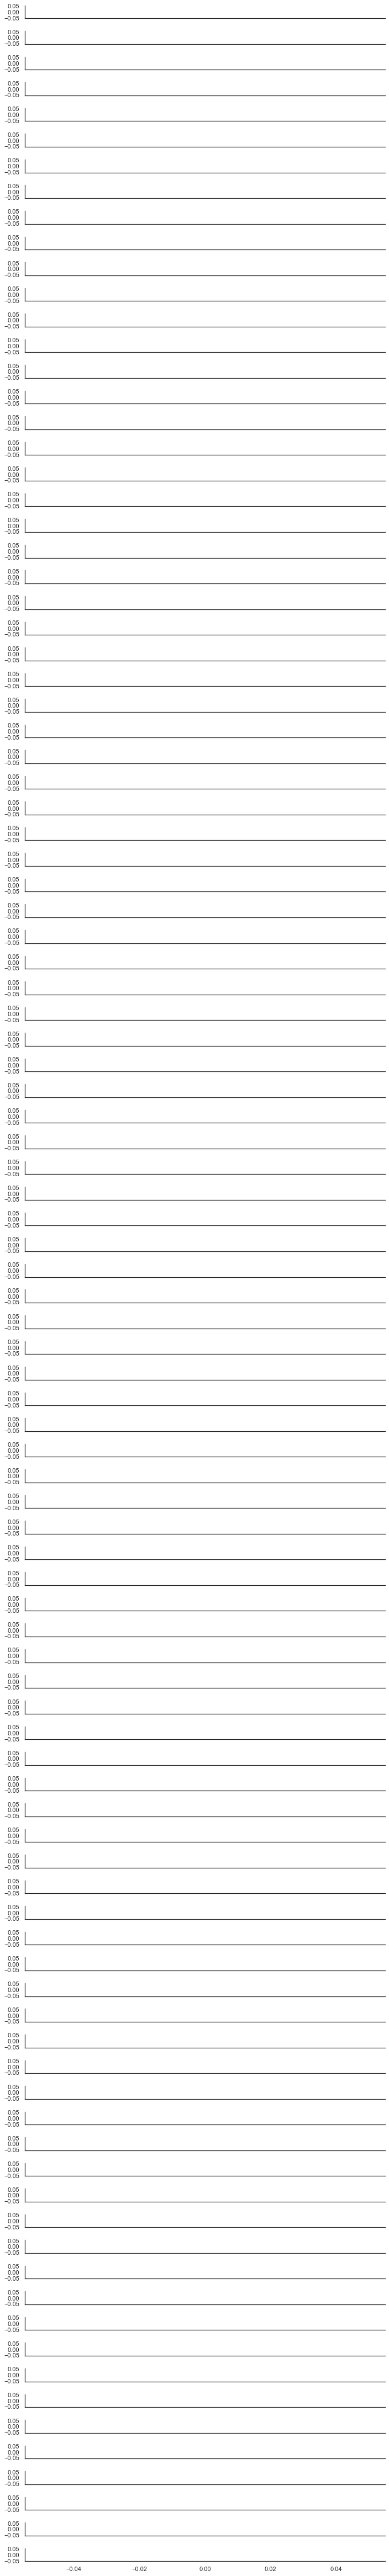

In [80]:
#         df_input, col_name, wavelength
kde_ridge(response_small, 'z', 'spectir_412nm')
plt.show()

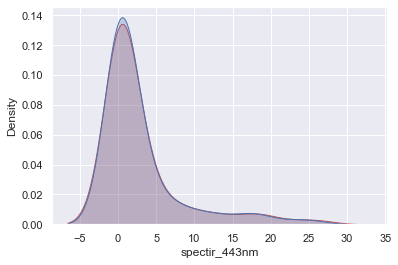

In [86]:
sns.set(style="darkgrid")
fig = sns.kdeplot(response_small['spectir_443nm'], shade=True, color="r")
fig = sns.kdeplot(response_small['spectir_412nm'], shade=True, color="b")
plt.show()

#from https://seaborn.pydata.org/examples/kde_ridgeplot.html
#THIS DOESNT D+FRICMIN WORK
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [16]:
response_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   time           100 non-null    datetime64[ns, UTC]
 1   z              100 non-null    float64            
 2   spectir_412nm  100 non-null    float64            
 3   spectir_443nm  100 non-null    float64            
 4   spectir_490nm  100 non-null    float64            
 5   spectir_510nm  100 non-null    float64            
 6   spectir_555nm  100 non-null    float64            
 7   spectir_620nm  100 non-null    float64            
 8   spectir_683nm  100 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 7.2 KB


In [ ]:
#t notes
'''
month -> wavelength (facet wrap)
pm2.5 -> datetime
count? -> spectir
'''
#use hourly data
df_hour19 = df[df['Year']=='2019'] 
df_hd19 = [df_hour19[df_hour19['District']==i] for i in list_district]

keep_sname = []
order = range(len(list_district))
for i in order:
    kde_ridge(df_hd19[i], 'PM2.5', 'YM', list_district[i])
    keep_sname.append('kde_' + str(i) + '.png')
    plt.savefig('kde_' + str(i) + '.png')
    plt.show()

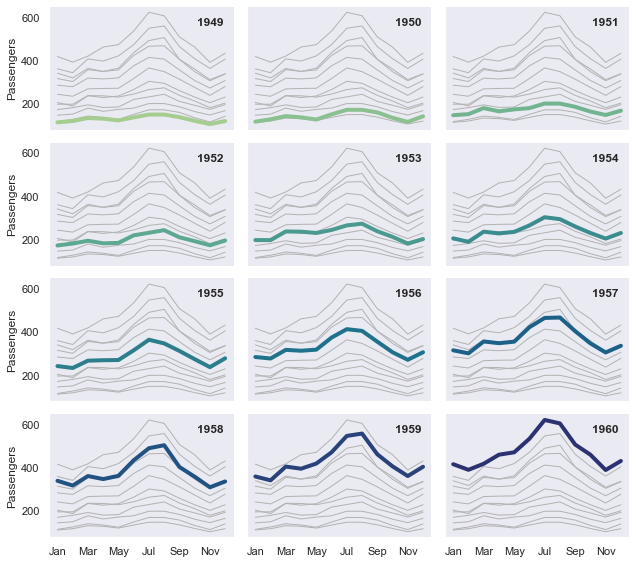

In [17]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

<AxesSubplot:>

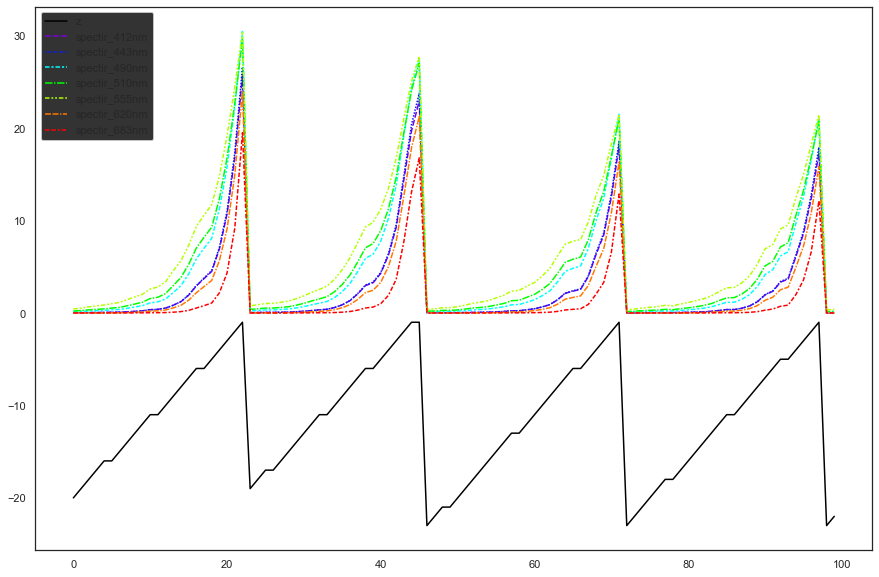

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=response_small,palette = pal_black)

sat feb 4: time to pivot

In [22]:
response_small

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
0,2014-04-17 22:28:00+00:00,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17 22:28:00+00:00,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17 22:28:00+00:00,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17 22:28:00+00:00,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17 22:28:00+00:00,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
95,2014-04-17 23:01:00+00:00,-3.0,8.599717,8.857267,12.579870,13.270859,14.990203,7.246668,3.582555
96,2014-04-17 23:01:00+00:00,-2.0,12.345873,12.763302,16.544596,16.866558,18.231743,10.846807,6.607488
97,2014-04-17 23:01:00+00:00,-1.0,17.270360,17.934012,21.126544,20.782391,21.453608,15.851361,12.139527
98,2014-04-17 23:08:00+00:00,-23.0,0.021252,0.012929,0.094217,0.150298,0.326444,-0.004977,0.006158


In [42]:
#aha 

response_small.columns.tolist()[2:]
#gives 3rd + col names

response_smalong = pd.melt(response_small, id_vars=['time', 'z'], value_vars=response_small.columns.tolist()[2:],var_name='wavelength', 
                           value_name='spectir')
response_smalong
#this is my pivoted guy

,time,z,wavelength,spectir
0,2014-04-17 22:28:00+00:00,-20.0,spectir_412nm,0.030614
1,2014-04-17 22:28:00+00:00,-19.0,spectir_412nm,0.037231
2,2014-04-17 22:28:00+00:00,-18.0,spectir_412nm,0.048694
3,2014-04-17 22:28:00+00:00,-17.0,spectir_412nm,0.057129
4,2014-04-17 22:28:00+00:00,-16.0,spectir_412nm,0.065813
...,...,...,...,...
695,2014-04-17 23:01:00+00:00,-3.0,spectir_683nm,3.582555
696,2014-04-17 23:01:00+00:00,-2.0,spectir_683nm,6.607488
697,2014-04-17 23:01:00+00:00,-1.0,spectir_683nm,12.139527
698,2014-04-17 23:08:00+00:00,-23.0,spectir_683nm,0.006158


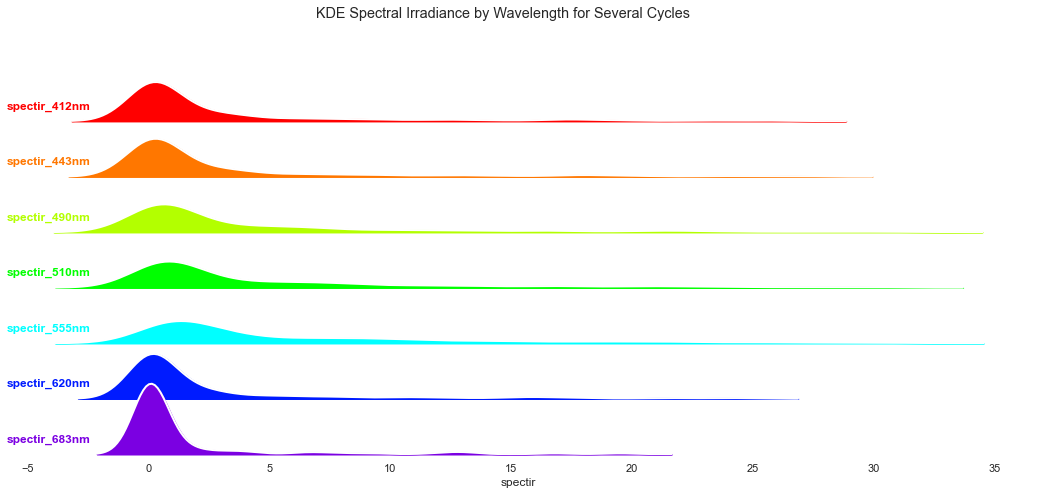

In [134]:
#trying this one wacky thing

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
#see pal box

g = sns.FacetGrid(response_smalong, row="wavelength", hue="wavelength", aspect=15, height=1, palette=pal_r)

# Draw the densities in a few steps
g.map(sns.kdeplot, "spectir",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "spectir", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
#g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "spectir")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25,top=0.9)
g.fig.suptitle('KDE Spectral Irradiance by Wavelength for Several Cycles')



# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

slay!!1 ok now figuring out why max is so high. 35?

In [57]:
response_smalong["spectir"].max()
#response_smalong["spectir"].min()

30.4683087317

In [73]:
#manually select one pass/charge/deployment
one_pass = response_small[46:72]
one_pass

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
46,2014-04-17 22:48:00+00:00,-23.0,0.024901,0.018159,0.125063,0.198835,0.397833,-0.005235,0.006023
47,2014-04-17 22:48:00+00:00,-22.0,0.027285,0.020323,0.137052,0.219910,0.442440,-0.004652,0.006018
48,2014-04-17 22:48:00+00:00,-21.0,0.033615,0.027464,0.175072,0.283286,0.565874,-0.001811,0.005810
49,2014-04-17 22:49:00+00:00,-21.0,0.032297,0.027380,0.174641,0.288131,0.587269,-0.002576,0.006009
50,2014-04-17 22:49:00+00:00,-20.0,0.039735,0.034329,0.209401,0.340439,0.680516,0.000049,0.006437
51,2014-04-17 22:49:00+00:00,-19.0,0.050739,0.046080,0.265911,0.431867,0.857284,0.005297,0.006301
52,2014-04-17 22:49:00+00:00,-18.0,0.066144,0.062507,0.336180,0.541895,1.061448,0.011327,0.007218
53,2014-04-17 22:49:00+00:00,-17.0,0.076920,0.073600,0.375999,0.602366,1.175055,0.017629,0.008204
54,2014-04-17 22:49:00+00:00,-16.0,0.094308,0.091596,0.438619,0.697635,1.348592,0.027623,0.009242
55,2014-04-17 22:49:00+00:00,-15.0,0.127796,0.124599,0.550029,0.861159,1.630086,0.045935,0.010875


<AxesSubplot:>

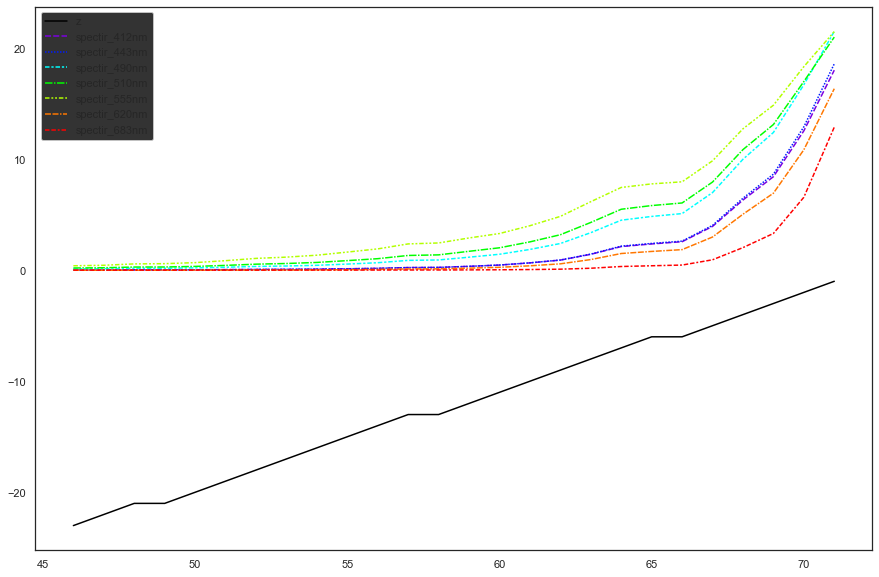

In [78]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=one_pass,palette = pal_black)

In [75]:
one_pass_smalong = pd.melt(one_pass, id_vars=['time', 'z'], value_vars=response_small.columns.tolist()[2:],var_name='wavelength', 
                           value_name='spectir')
one_pass_smalong

,time,z,wavelength,spectir
0,2014-04-17 22:48:00+00:00,-23.0,spectir_412nm,0.024901
1,2014-04-17 22:48:00+00:00,-22.0,spectir_412nm,0.027285
2,2014-04-17 22:48:00+00:00,-21.0,spectir_412nm,0.033615
3,2014-04-17 22:49:00+00:00,-21.0,spectir_412nm,0.032297
4,2014-04-17 22:49:00+00:00,-20.0,spectir_412nm,0.039735
...,...,...,...,...
177,2014-04-17 22:51:00+00:00,-5.0,spectir_683nm,0.935313
178,2014-04-17 22:51:00+00:00,-4.0,spectir_683nm,2.033363
179,2014-04-17 22:51:00+00:00,-3.0,spectir_683nm,3.307146
180,2014-04-17 22:51:00+00:00,-2.0,spectir_683nm,6.565675


In [118]:
#colors block
colors_black = ["00000","#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal_black = sns.color_palette(colors_black)
pal_black

colors = ["#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal = sns.color_palette(colors)
pal

colors_r = ["#ff0000", "#ff7700", "#b3ff00", "#00ff00", "#00ffff", "#001bff", "#7b00e2"]
pal_r = sns.color_palette(colors_r)
pal_r

[(1.0, 0.0, 0.0),
 (1.0, 0.4666666666666667, 0.0),
 (0.7019607843137254, 1.0, 0.0),
 (0.0, 1.0, 0.0),
 (0.0, 1.0, 1.0),
 (0.0, 0.10588235294117647, 1.0),
 (0.4823529411764706, 0.0, 0.8862745098039215)]

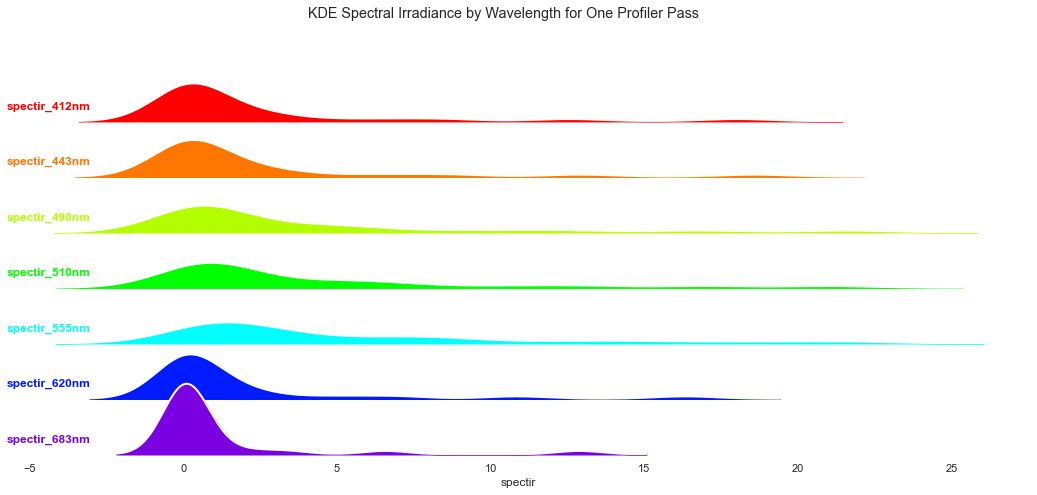

In [128]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
#see pal box

g = sns.FacetGrid(one_pass_smalong, row="wavelength", hue="wavelength", aspect=15, height=1, palette=pal_r)

# Draw the densities in a few steps
g.map(sns.kdeplot, "spectir",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "spectir", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
#g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "spectir")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25,top=0.9)
g.fig.suptitle('KDE Spectral Irradiance by Wavelength for One Profiler Pass')



# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)